<a href="https://colab.research.google.com/github/zakyzuf/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum MODUL11 – Metode Deteksi Objek: Template Matching,Edge Detection,Corner Detection,Grid Detection,Contour Detection

1. Import beberapa library dan akses folder yang ada di Drive.

In [80]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [81]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

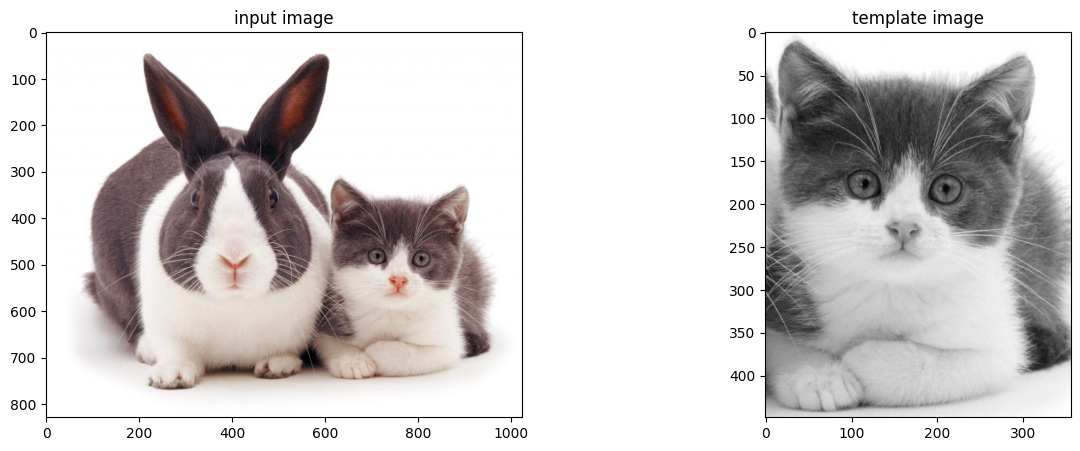

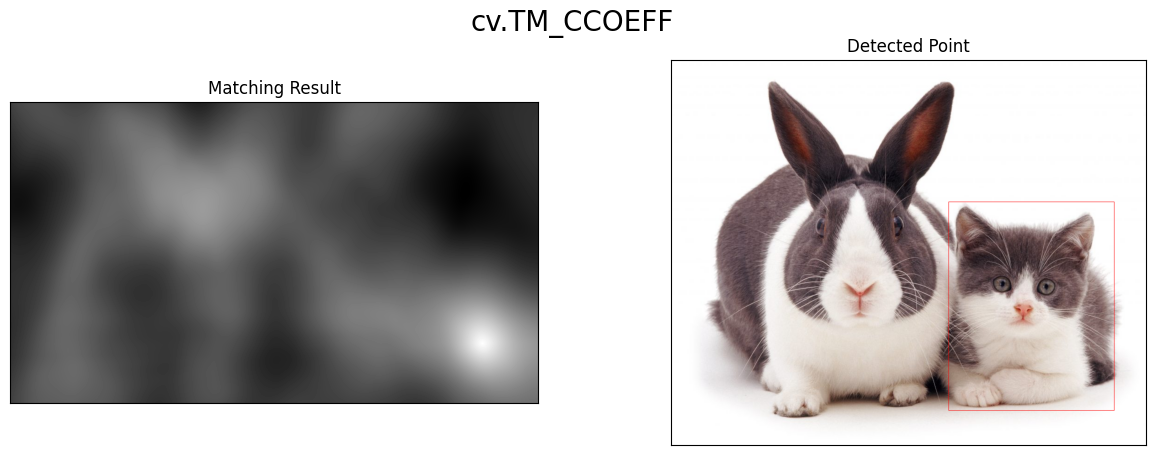

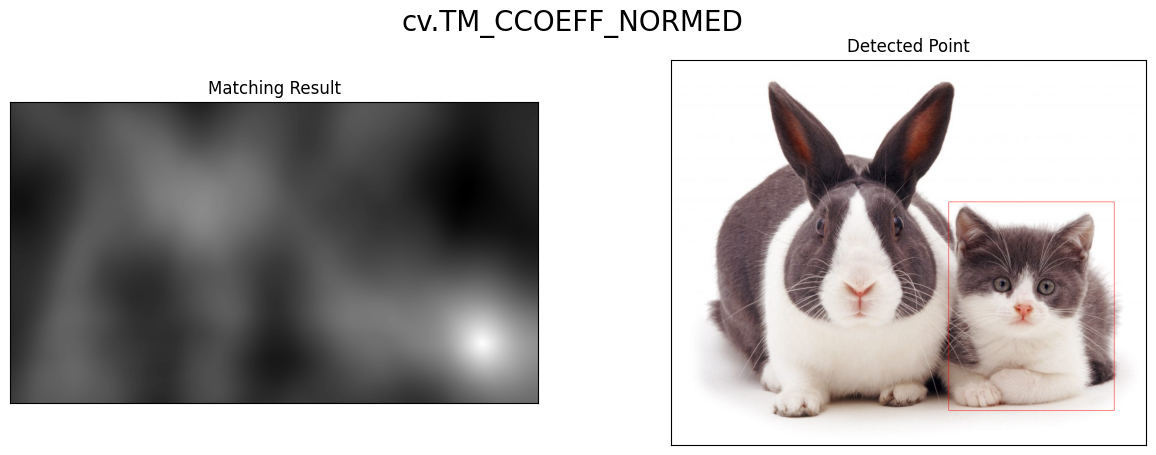

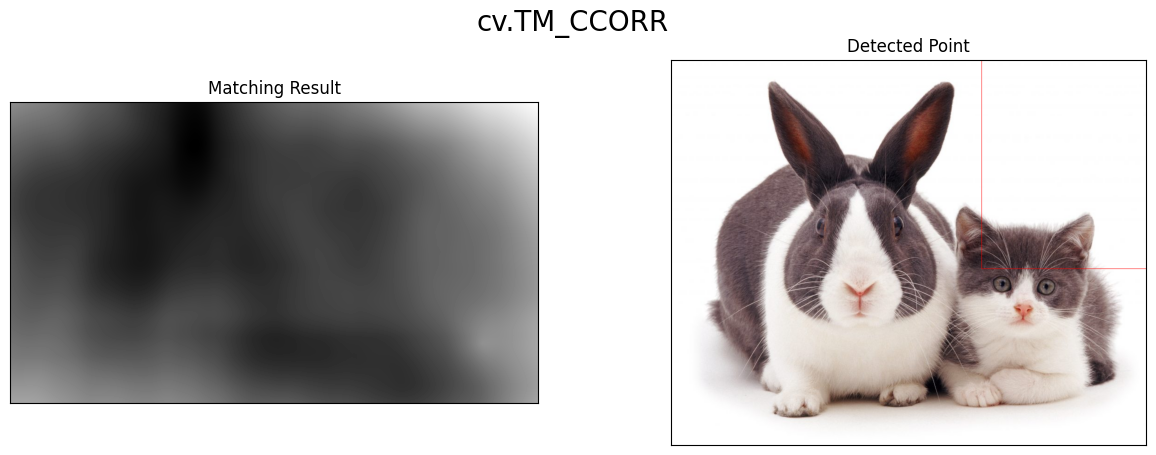

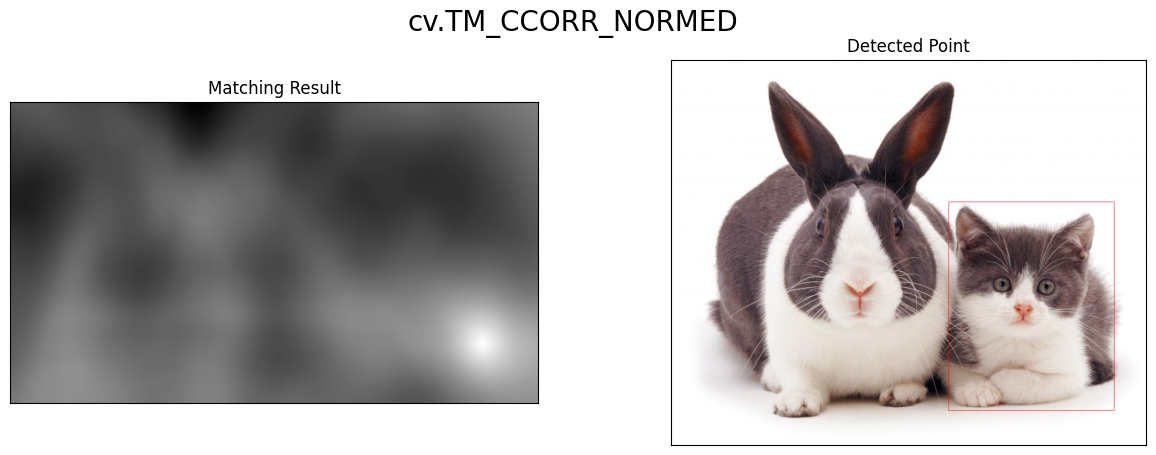

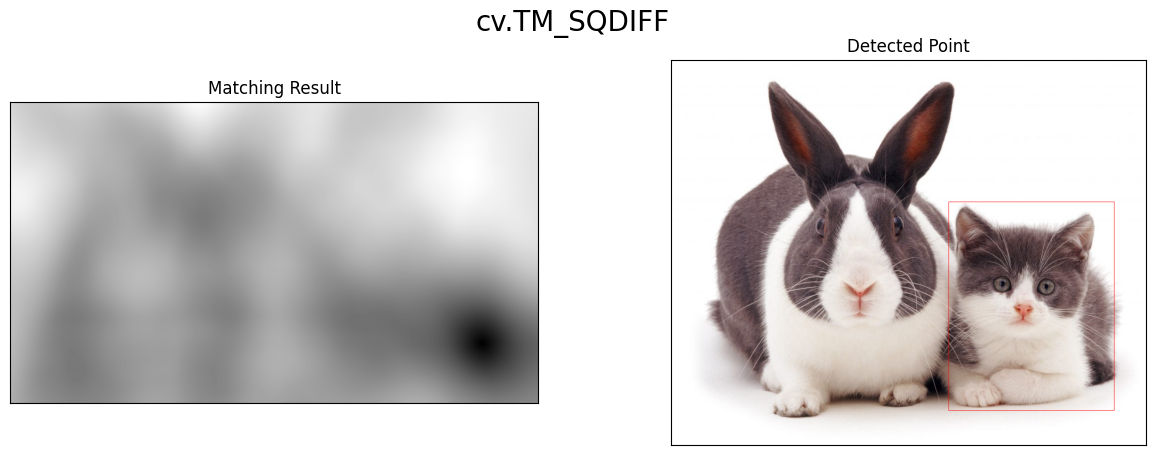

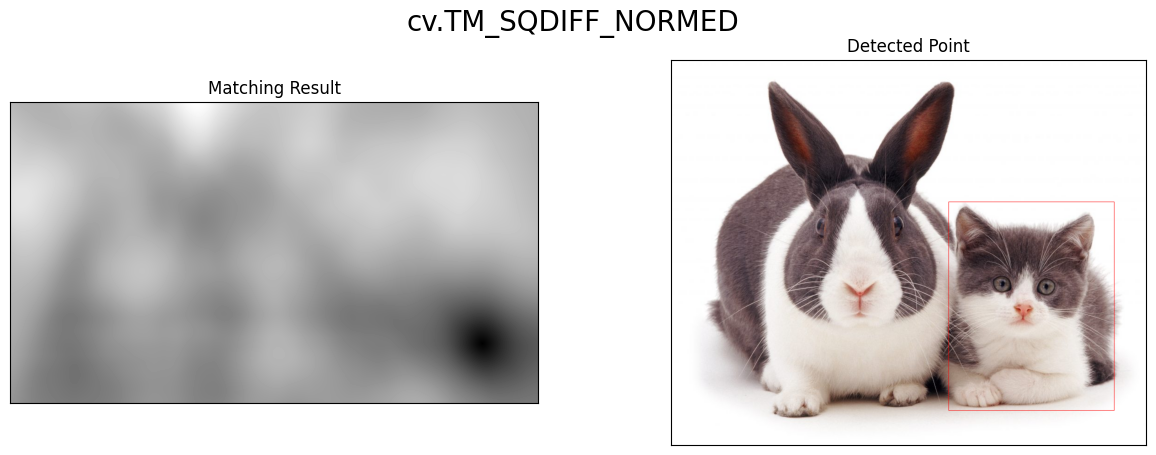

In [82]:
# Load gambar utama dan gambar template
img = cv.imread('/content/drive/MyDrive/PCVK/Object_Detection/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/PCVK/Object_Detection/cat2_templatejpg.jpg', 0)
img_copy = img.copy()
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
w, h = template.shape[::-1]

# Membuat 2 plot untuk citra input dan template
f, axarr = plt. subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# List metode matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Perulangan tiap metode
for meth in methods:
    img = img_copy.copy()
    method = eval(meth)
    # Menerapkan template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()


3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

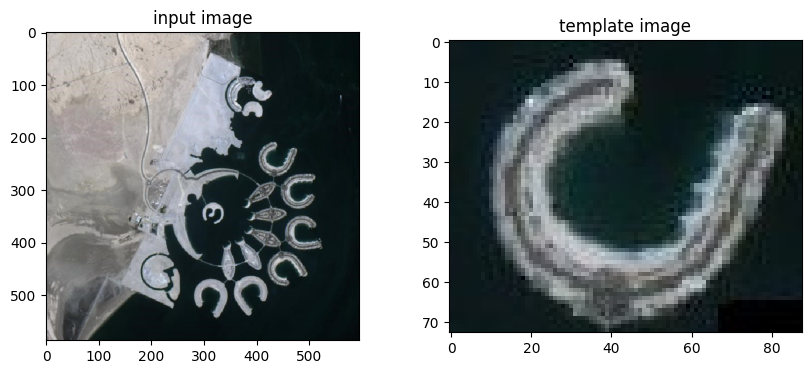

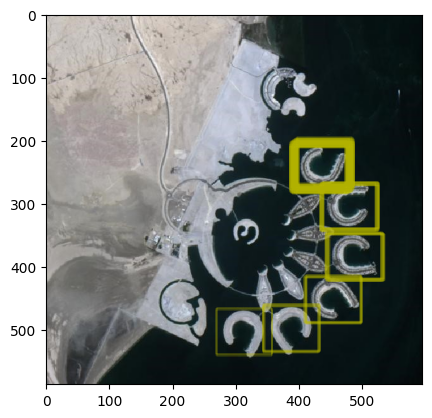

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def template_matching(input_image, template_image, threshold=0.45):
    # Load gambar
    img = np.array(Image.open(input_image))
    template = np.array(Image.open(template_image))

    img_gray = np.mean(img, axis=-1)
    template_gray = np.mean(template, axis=-1)

    # Mendapatkan dimensi gambar dan template
    img_height, img_width = img_gray.shape
    template_height, template_width = template_gray.shape

    # Inisialisasi hasill matrix
    result = np.zeros((img_height - template_height + 1, img_width - template_width + 1))

    # Melakukan template matching
    for y in range(img_height - template_height + 1):
        for x in range(img_width - template_width + 1):
            # Ekstrak wilayah yang diminati (ROI) dari gambar
            roi = img_gray[y:y + template_height, x:x + template_width]

            # Hitung korelasi silang yang dinormalisasi
            result[y, x] = np.sum((roi - np.mean(roi)) * (template_gray - np.mean(template_gray))) / (
                    np.std(roi) * np.std(template_gray) * template_height * template_width)

    # Temukan lokasi di mana korelasi silang yang dinormalisasi berada di atas ambang batas
    loc = np.where(result >= threshold)

    return loc

def plot_result(input_image, template_image, loc):
    img = np.array(Image.open(input_image))

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    template_height, template_width = np.array(Image.open(template_image)).shape[:-1]

    for pt in zip(*loc[::-1]):
        rect = patches.Rectangle(pt, template_width, template_height, linewidth=0.1, edgecolor='y', facecolor='none')
        ax.add_patch(rect)

    plt.show()

input_image_path = '/content/drive/MyDrive/PCVK/Object_Detection/bahrain.jpg'
template_image_path = '/content/drive/MyDrive/PCVK/Object_Detection/bahrain-template.jpg'

input_image2 = cv.imread('/content/drive/MyDrive/PCVK/Object_Detection/bahrain.jpg')
template_image2 = cv.imread('/content/drive/MyDrive/PCVK/Object_Detection/bahrain-template.jpg')

# Membuat 2 plot untuk citra input dan template
f, axarr = plt. subplots(1,2,figsize=(10,4))
axarr[0].imshow(cv.cvtColor(input_image2, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template_image2, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Melakukan template matching
loc = template_matching(input_image_path, template_image_path)

# Hasil
plot_result(input_image_path, template_image_path, loc)


4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

(<Axes: title={'center': 'c. Laplacian Edge Detection'}>,
 Text(0.5, 1.0, 'c. Laplacian Edge Detection'))

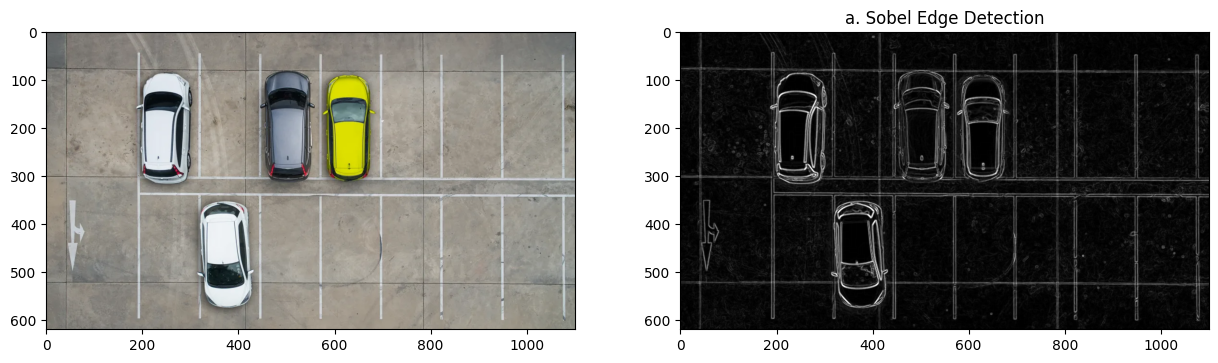

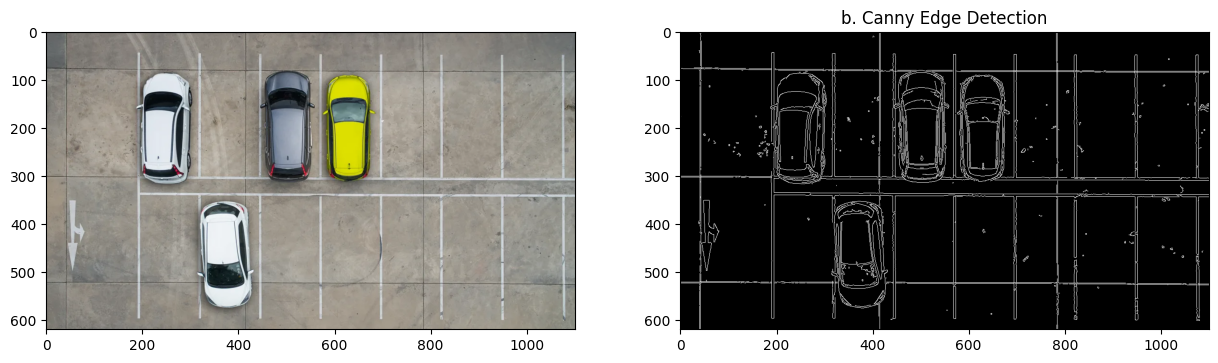

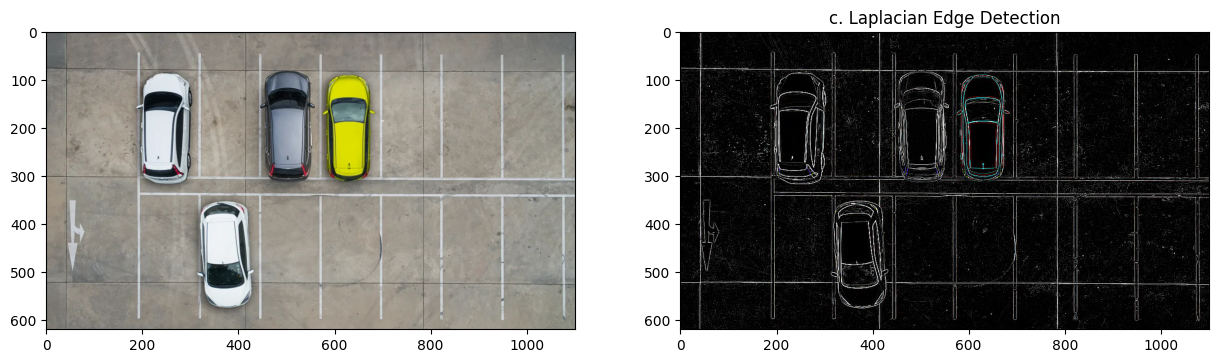

In [84]:
from cv2.gapi import Laplacian
img0 = cv.imread('/content/drive/MyDrive/PCVK/Object_Detection/car-park.jpg')

gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

img = cv.GaussianBlur(gray,(3,3),0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# a. Sobel Edge Detection
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

# b. Canny Edge Detection
canny = cv.Canny(img0, 100, 200)

# c. Laplacian Edge Detection
laplacian = cv.Laplacian(img0, cv.CV_16S, ksize=3)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray'), plt.title('a. Sobel Edge Detection')
axarr[1].imshow(cv.cvtColor(img_sobelxy, cv.COLOR_BGR2RGB))

f, axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(canny, cmap = 'gray'), plt.title('b. Canny Edge Detection')

f, axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(laplacian, cmap = 'gray'), plt.title('c. Laplacian Edge Detection')

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:

(<matplotlib.image.AxesImage at 0x7953cc574520>,
 Text(0.5, 1.0, 'b. Shi-Tomasi Detection'))

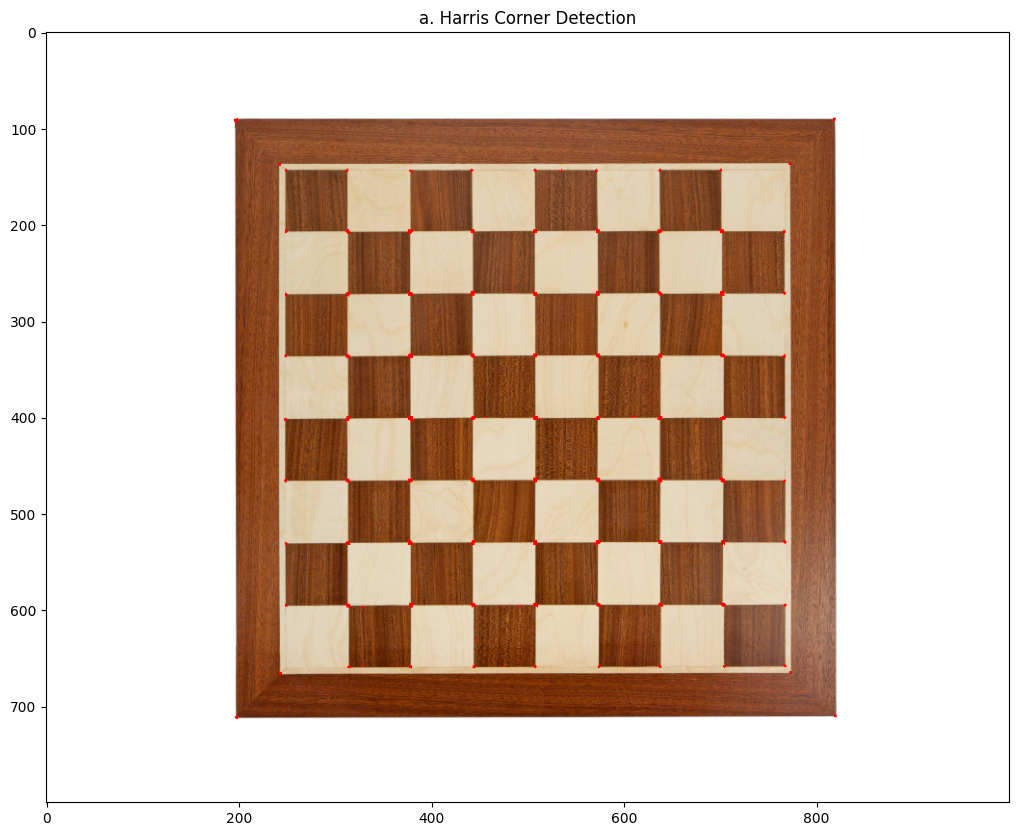

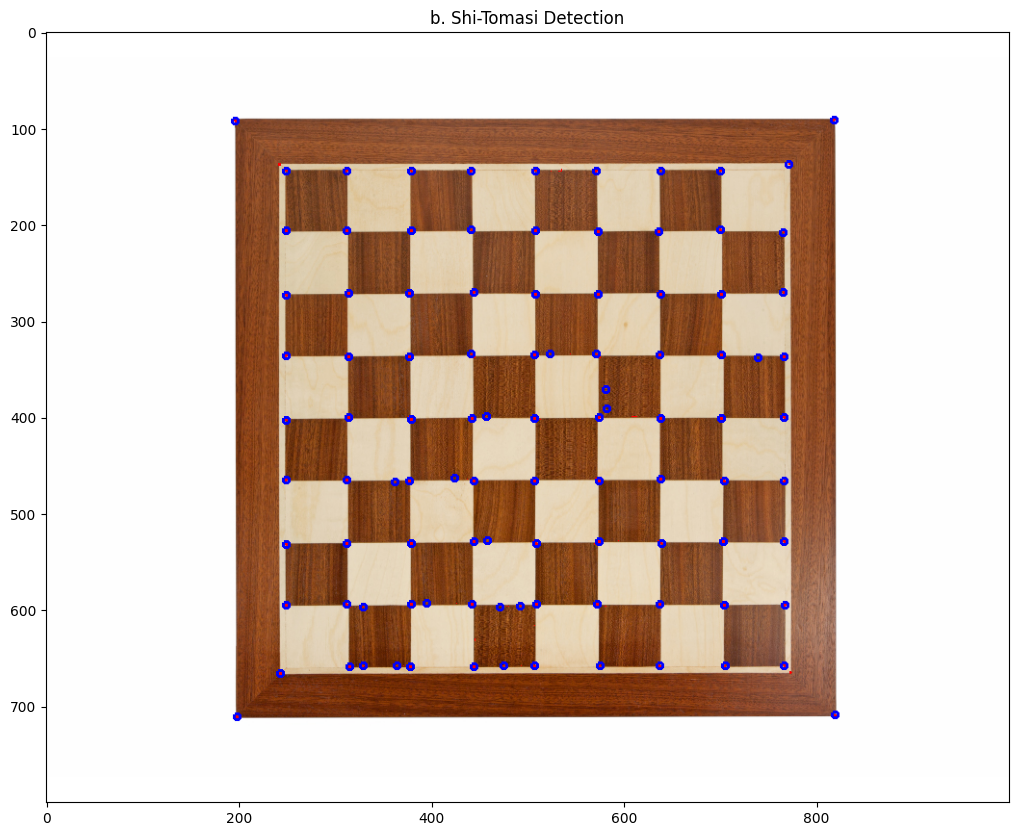

In [85]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Object_Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
# a. Harris Corner Detection
harris_output = cv.cornerHarris(gray_img,2,3, 3)
# Hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

# Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]
plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB)), plt.title('a. Harris Corner Detection')

# b. Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB)), plt.title('b. Shi-Tomasi Detection')


6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

Number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


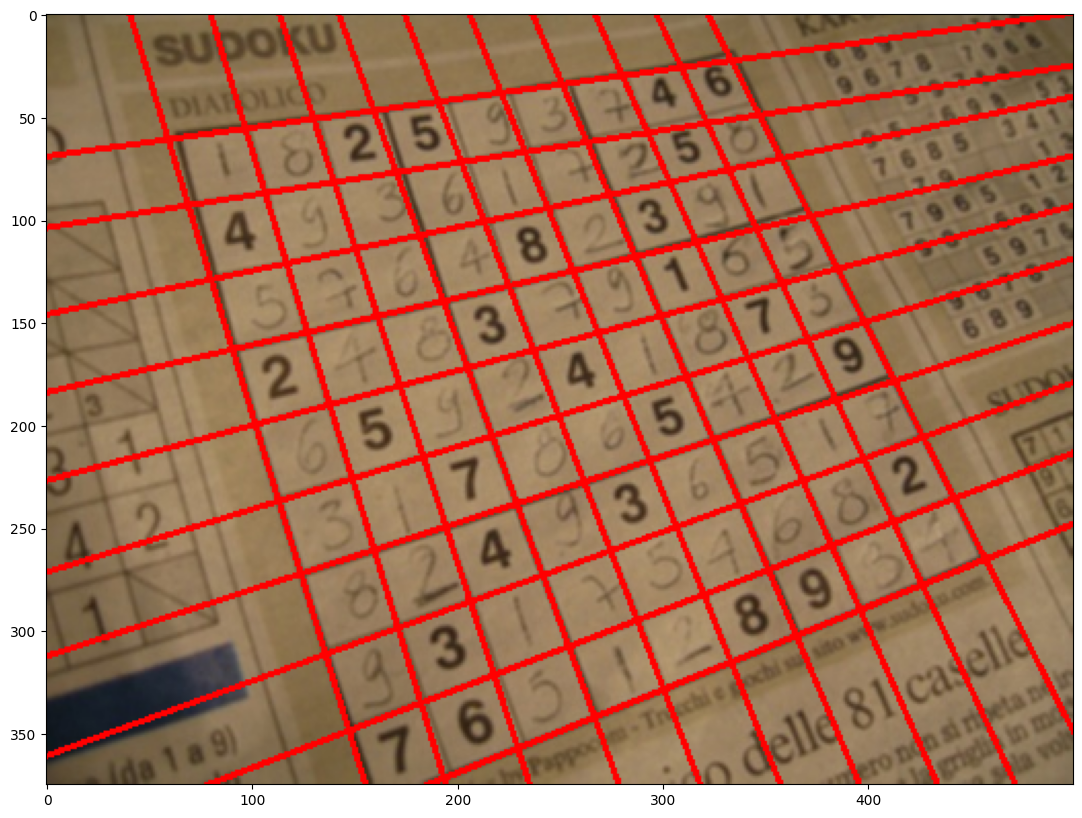

In [86]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Object_Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('Number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

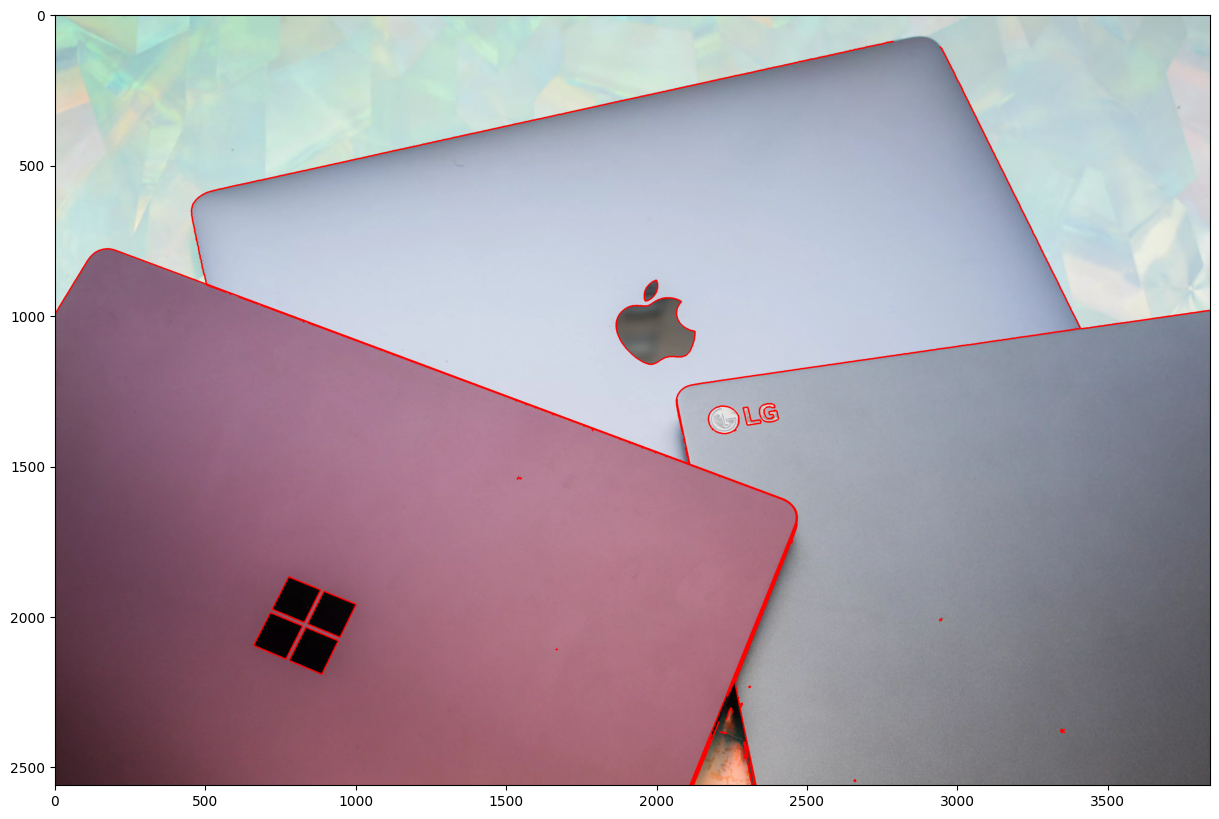

In [87]:
img = cv.imread('/content/drive/MyDrive/PCVK/Object_Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Pengayaan Materi KTP

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

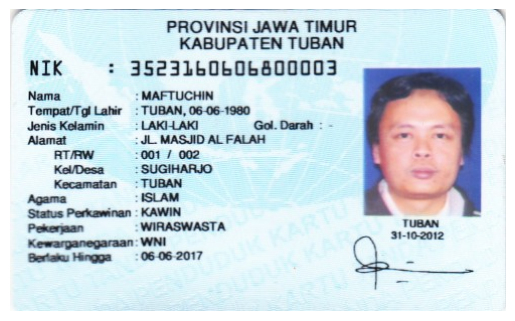

In [88]:
img = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp4.png')

plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

2. Muat 2 library berikut sebagai tahapan persiapan

In [89]:
import cv2
import os

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [90]:
# Lokasi hasil pemotongan gambar KTP
path_plate = "/content/drive/MyDrive/PCVK/KTP_More"

# List untuk menyimpan nama file di direktori
file_names = []

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    # Mendapatkan path lengkap file
    file_path = os.path.join(path_plate, name_file)

    # Membaca gambar dari file
    src = cv2.imread(file_path)

    # Operasi lain yang ingin Anda lakukan pada gambar
    blurred = src.copy()
    gray = blurred.copy()

    # Menambahkan nama file ke dalam list
    file_names.append(name_file)

# Menampilkan daftar nama file
for file_name in file_names:
    print("Nama file:", file_name)

Nama file: KTP7.jpeg
Nama file: ktp.png
Nama file: ktp1.png
Nama file: ktp2.png
Nama file: ktp3.png
Nama file: ktp4.png
Nama file: ktp5.png
Nama file: ktp6.png


4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle
dapat direduksi

In [91]:
# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan
binerisasi citra (thresholding)

160.0 (636, 996)


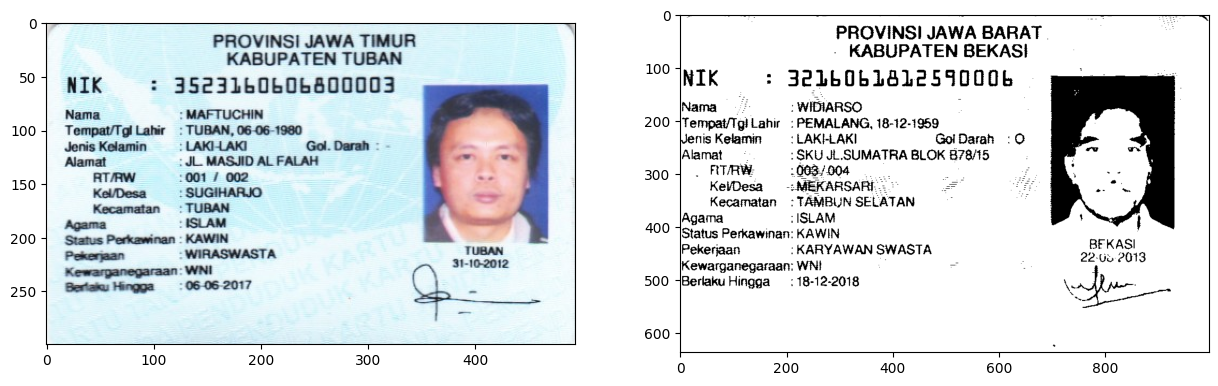

In [92]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()